In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

# Load the data
mashable = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
mashable

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Final Lab

You are hired as data scientists by Mashable, an online news platform that generates buzz through shares of its posts. Your task is to build a model to predict the number of shares a news article will receive based on its characteristics

## EDA

1. Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.
2. Build a linear regression model without higher-order terms and identify the most significant predictors.
3. Build a regression tree to identify important predictors.
4. Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable.
5. Write an EDA section in your technical report. Report the results of the iniitial models and include figures or tables that show the target variable and its relationship with potentially significant predictors.
6. Use appropriate methods to remove insignificant variables from the model.

#### Plot Target Variable

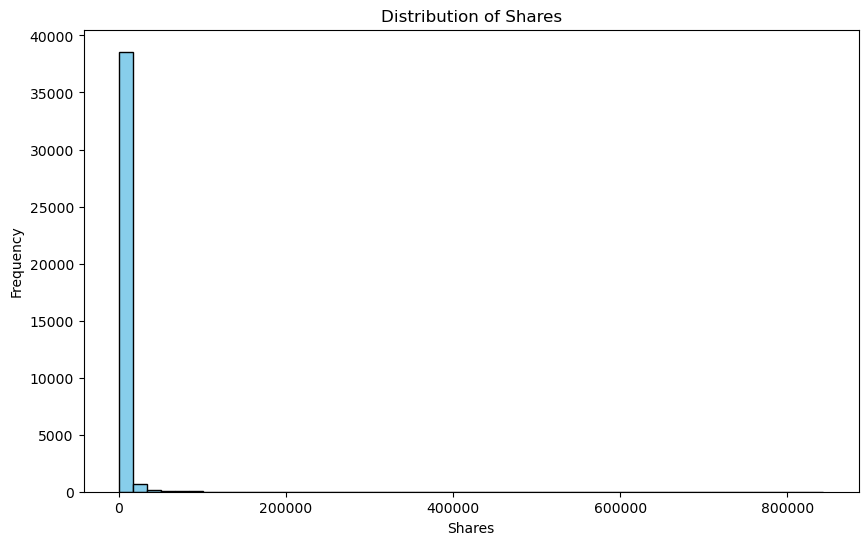

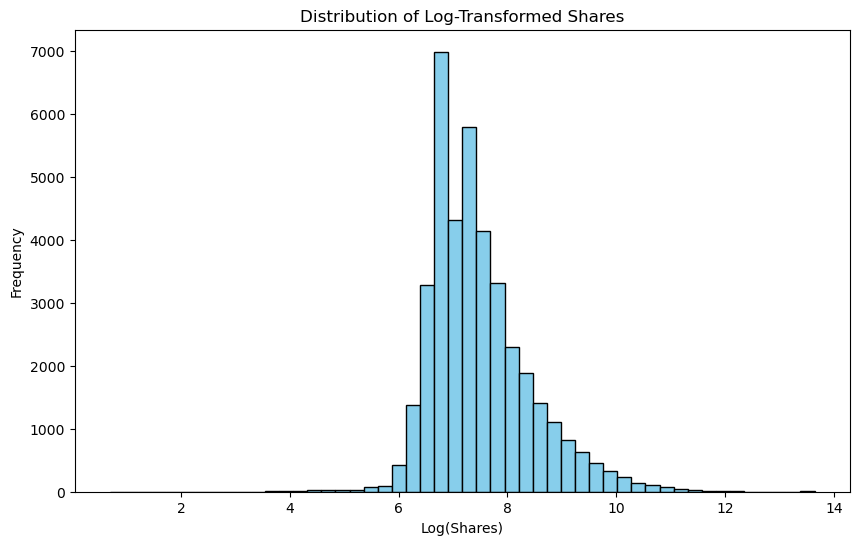

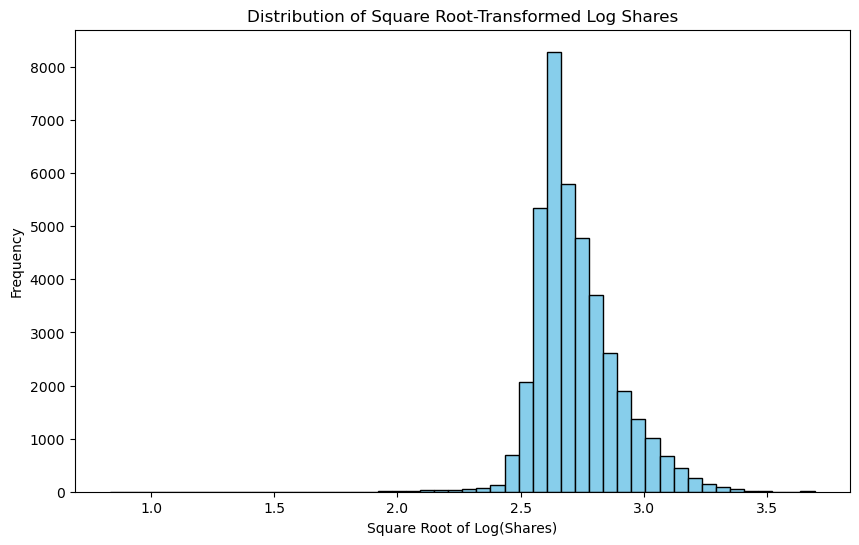

In [3]:
# Plot the 'shares' column
plt.figure(figsize=(10, 6))
plt.hist(mashable[' shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Take log transformation of the 'shares' column
mashable['log_shares'] = np.log(mashable[' shares'] + 1)

# Plot the log-transformed 'shares' column
plt.figure(figsize=(10, 6))
plt.hist(mashable['log_shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Shares')
plt.xlabel('Log(Shares)')
plt.ylabel('Frequency')
plt.show()

# Apply square root transformation on the log_shares data
mashable['sqrt_log_shares'] = np.sqrt(mashable['log_shares'])

# Plot the square root-transformed log_shares column
plt.figure(figsize=(10, 6))
plt.hist(mashable['sqrt_log_shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Square Root-Transformed Log Shares')
plt.xlabel('Square Root of Log(Shares)')
plt.ylabel('Frequency')
plt.show()

y=mashable['log_shares']
X=mashable.drop(columns=['sqrt_log_shares', ' shares', 'url', ' timedelta', 'log_shares'])

X = X.dropna()
y = y.dropna()

In [4]:
X=pd.get_dummies(X, drop_first=False, dtype=int)
X = sm.add_constant(X)
X.head()

,const,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,1.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,1.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,1.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,1.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [5]:
y.head()

0    6.386879
1    6.568078
2    7.313887
3    7.090910
4    6.226537
Name: log_shares, dtype: float64

In [6]:
def stepwise_regression(X, y):
    improved = True
    
    while improved:
        model = sm.OLS(y, X).fit()
        pvalues_no_const = model.pvalues.drop('const')
        max_pvalue = pvalues_no_const.max()
        print('Max pvalue is: ', max_pvalue, '. All predictors are now significant.')
        
        if max_pvalue > 0.05:
            worst_predictor = pvalues_no_const.idxmax()
            print('Dropping ', worst_predictor, 'with a p-value of: ', max_pvalue)
            X=X.drop(columns=[worst_predictor])
        else:
            improved = False

    return X, model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
significant_predictors_train, final_model = stepwise_regression(X_train, y_train)

significant_predictors_test = X_test[significant_predictors_train.columns]

Max pvalue is:  0.8611376794683997 . All predictors are now significant.
Dropping   global_sentiment_polarity with a p-value of:  0.8611376794683997
Max pvalue is:  0.8181626035833226 . All predictors are now significant.
Dropping   n_non_stop_words with a p-value of:  0.8181626035833226
Max pvalue is:  0.7594526116726138 . All predictors are now significant.
Dropping   min_negative_polarity with a p-value of:  0.7594526116726138
Max pvalue is:  0.715790751186672 . All predictors are now significant.
Dropping   kw_max_max with a p-value of:  0.715790751186672
Max pvalue is:  0.7143481462096934 . All predictors are now significant.
Dropping   self_reference_max_shares with a p-value of:  0.7143481462096934
Max pvalue is:  0.6834452605146429 . All predictors are now significant.
Dropping   avg_positive_polarity with a p-value of:  0.6834452605146429
Max pvalue is:  0.5946904875508705 . All predictors are now significant.
Dropping   max_negative_polarity with a p-value of:  0.594690487550

#### Build Regression Tree

In [8]:
significant_predictors_train.columns

Index(['const', ' n_tokens_title', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_rate_positive_words', ' rate_positive_words',
       ' rate_negative_words', ' min_positive_polarity',
       ' avg_negative_polarity', ' title_subjectivity',
    

In [14]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

plt.figure(figsize=(40, 20))
plot_tree(reg_tree, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['const', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object') instead.

<Figure size 4000x2000 with 0 Axes>

In [ ]:
X.columns

Index(['const', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polari

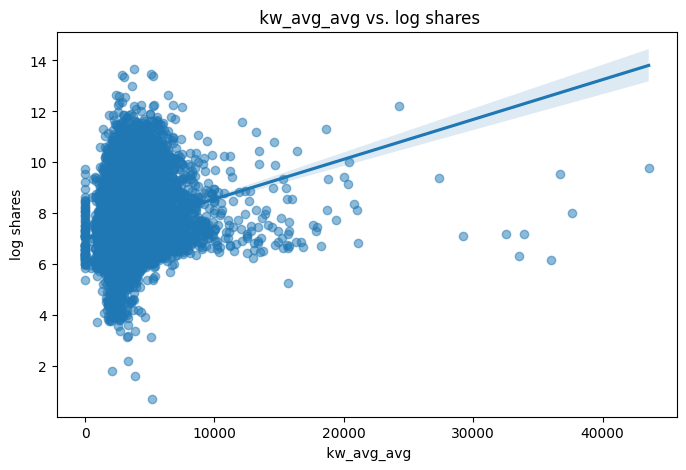

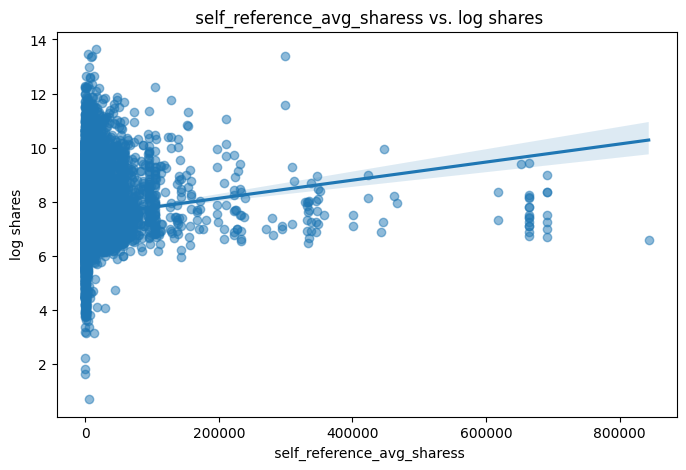

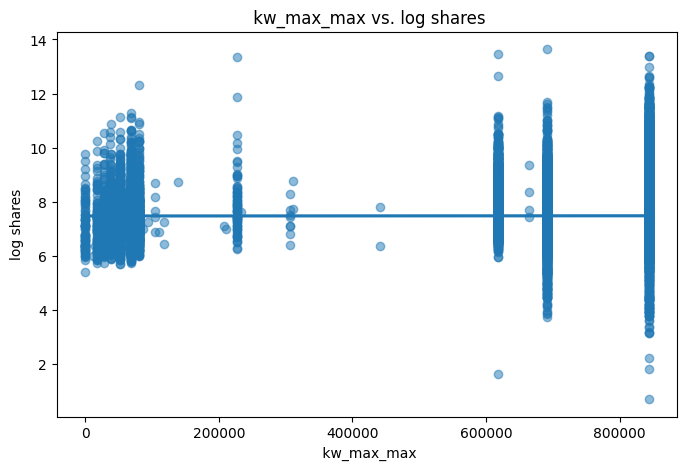

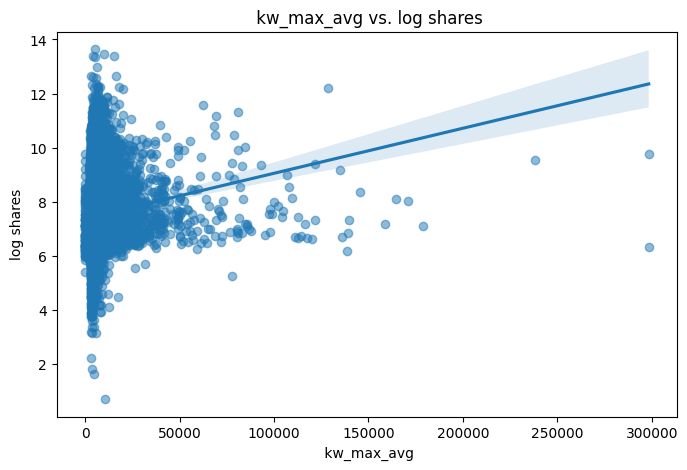

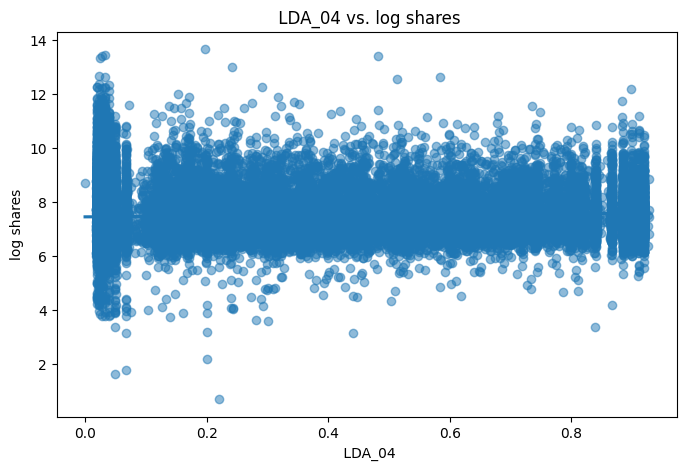

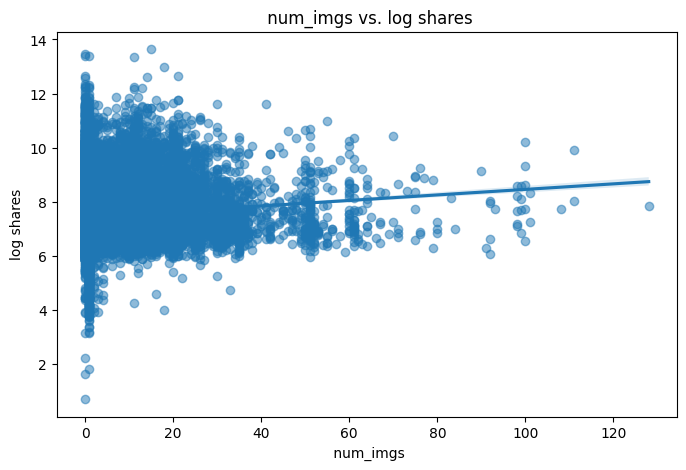

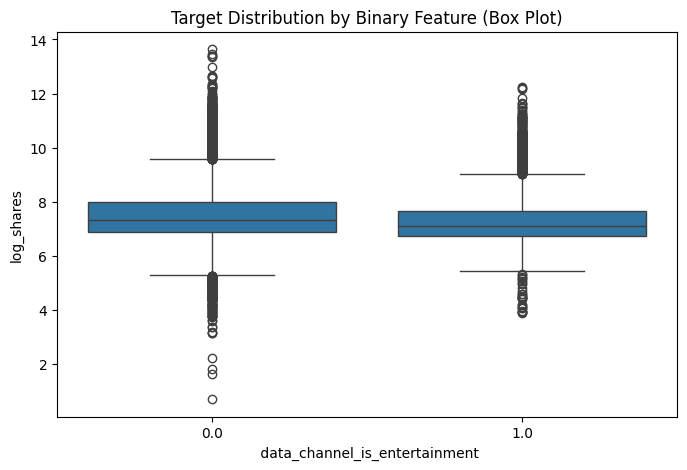

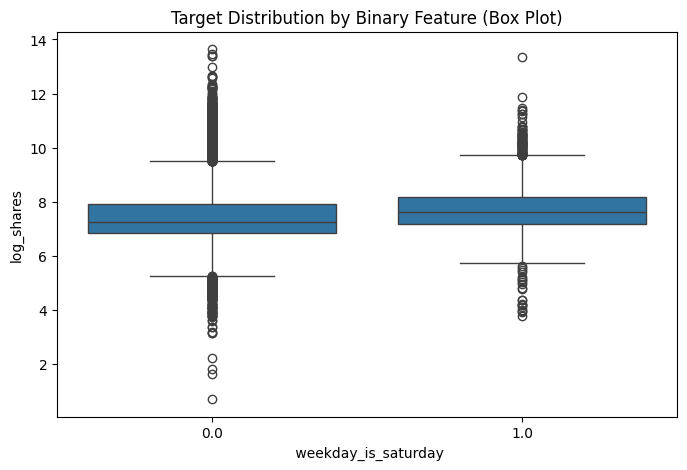

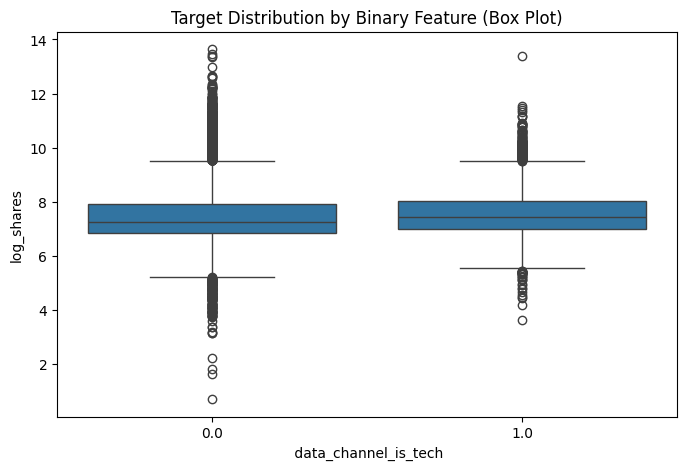

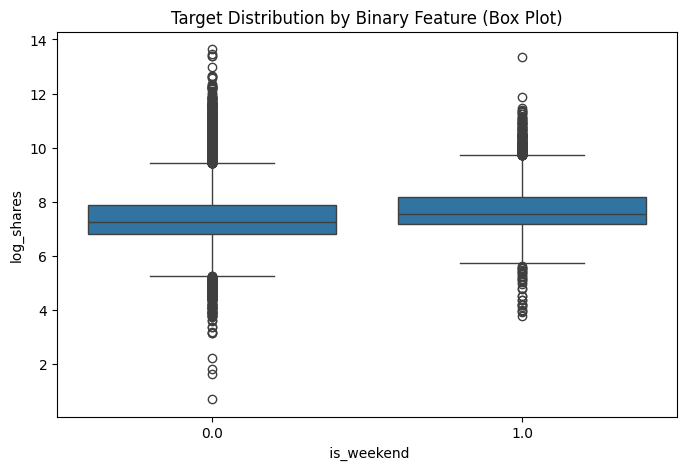

In [ ]:
important_continuous_features=[' kw_avg_avg', ' self_reference_avg_sharess', ' kw_max_max', ' kw_max_avg', ' LDA_04', ' num_imgs']
important_binary_features=[' data_channel_is_entertainment', ' weekday_is_saturday', ' data_channel_is_tech', ' is_weekend']

for feature in important_continuous_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=feature, y=y, data=mashable, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs. {'log shares'}')
    plt.xlabel(feature) 
    plt.ylabel('log shares')
    plt.show()

for feature in important_binary_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=feature, y=y, data=X)
    plt.title('Target Distribution by Binary Feature (Box Plot)')
    plt.show()

#### Additional Relationship Visualizations and Analysis

## Linear Regression Modeling

Build and tune a linear regression model with high
predictive power, explaining to Mashable which features most influence the number of
shares.
1. Split the data into training and testing sets. Use the training set for model fitting
and the testing set to check for overfitting and predictive performance.
2. Explore transformations of the target and other variables.
3. Explore higher-order terms.
4. Reduce the model using the following methods:
•Stepwise model evaluation methods to remove insignificant variables.
•LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best α.
5. Write a section in your technical report that reports the out-of-sample perfor-
mance of the models. Discuss the most significant predictors and evaluate the
model?s usefulness for predicting future shares

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31715, 59)
X_test shape: (7929, 59)
y_train shape: (31715,)
y_test shape: (7929,)


## Regression Tree Modeling

Build and tune a regression tree model.
1. Use the same training and testing sets as above.
2. Use cost-complexity pruning and cross-validation to find a model that fits well
on out-of-sample data.
3. Fit a random forest regression model, using cost-complexity pruning for the in-
dividual trees.
4. Write a section in your technical report that reports the out-of-sample perfor-
mance of the models. Discuss the model’s usefulness for predicting future shares.

In [11]:
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
y_train_tree = y_train.copy()
y_test_tree = y_test.copy()

In [ ]:
# Remove the target. Also remove the day variable, doesn't seem like it should be useful
pm25_predictors = pm25.drop(columns = ["pm25","day"])

# Dummify
X = pd.get_dummies(pm25_predictors,drop_first = True)

y = np.log(pm25["pm25"])

# split into train/test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



tree_prep = DecisionTreeRegressor(max_depth = 3)
mod_tree = tree_prep.fit(X_train,y_train)
plt.figure(figsize = (25,10))
tree.plot_tree(mod_tree, feature_names=X.columns, filled = True,fontsize = 12)

# Define the parameter grid for ccp_alpha
param_grid = {'ccp_alpha': np.linspace(0, 0.01, 50)}

# Initialize the DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=reg_tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_tree, y_train_tree)

# Get the best model
best_reg_tree = grid_search.best_estimator_

# Predict on the test set
y_pred_pruned = best_reg_tree.predict(X_test_tree)

# Print the best ccp_alpha
print(f"Best ccp_alpha: {grid_search.best_params_['ccp_alpha']}")

# Evaluate the model
mse = mean_squared_error(y_test_tree, y_pred_pruned)
r2 = r2_score(y_test_tree, y_pred_pruned)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the pruned tree
plt.figure(figsize=(40, 20))
plot_tree(best_reg_tree, filled=True, feature_names=X_train_tree.columns, fontsize=12)
plt.show()

Best ccp_alpha: 0.0008163265306122449
Mean Squared Error: 0.762324869898126
R^2 Score: 0.11068626819344474


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['const', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object') instead.

<Figure size 4000x2000 with 0 Axes>

## Conclusion

Compare each model’s predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business concerns and presents your
final model along with your confidence in its predictions.
2